In [44]:
# Importing required libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from PIL import Image

In [42]:
# Correct the path formatting
train_dir = r'D:\Rishabh\coding\Deep Learning Projects\Cats vs Dogs Classifier\data\train'
test_dir = r'D:\Rishabh\coding\Deep Learning Projects\Cats vs Dogs Classifier\data\test'


# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,         
    rotation_range=40,        
    width_shift_range=0.2,    
    height_shift_range=0.2,   
    shear_range=0.2,          
    zoom_range=0.2,           
    horizontal_flip=True,     
    fill_mode='nearest',
    validation_split=0.2  # Splitting 20% of training data for validation
)

# Create training data generator (80% of data)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training',  # Use this subset for training
    color_mode='grayscale'
)

# Create validation data generator (20% of data)
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation',  # Use this subset for validation
    color_mode='grayscale'
)


test_datagen = ImageDataGenerator(rescale = 1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    directory=test_dir,                 # Correct path to the test images
    target_size=(128, 128),             # Resize images to match input shape
    batch_size=32,                      # Batch size
    class_mode=None,                    # No labels required
    color_mode='grayscale',             # Grayscale images
    shuffle=False                       # Don't shuffle so predictions match image order
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [12]:
# Building the model 

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(pool_size=(2, 2)),  # Reduce spatial dimensions

    Conv2D(64, (3, 3), activation='relu'),  # Second convolution layer
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),  # Third convolution layer
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),  # Flatten the output to feed into dense layers
    Dense(128, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout to reduce overfitting
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

c:\Users\Lenovo\anaconda3\envs\MachineLearning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,193 (12.60 MB)

 Trainable params: 3,304,193 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [16]:
history = model.fit(
    train_generator, 
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 137s 219ms/step - accuracy: 0.5640 - loss: 0.6826 - val_accuracy: 0.6392 - val_loss: 0.6494
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 132s 210ms/step - accuracy: 0.6047 - loss: 0.6612 - val_accuracy: 0.6086 - val_loss: 0.6640
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 224ms/step - accuracy: 0.6464 - loss: 0.6383 - val_accuracy: 0.6712 - val_loss: 0.6048
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 228ms/step - accuracy: 0.6771 - loss: 0.6039 - val_accuracy: 0.7074 - val_loss: 0.5748
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 156s 249ms/step - accuracy: 0.6948 - loss: 0.5877 - val_accuracy: 0.7194 - val_loss: 0.5544
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 175s 279ms/step - accuracy: 0.7110 - loss: 0.5663 - val_accuracy: 0.7342 - val_loss: 0.5331
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 173s 276ms/step - accuracy: 0.7306 - loss: 0.5420 - val_accuracy: 0.7398 - val_loss: 0.5269
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 182s 291ms/step - accuracy: 0.7289 -

In [47]:
# Define the path to your test images
test_dir = r'D:\Rishabh\coding\Deep Learning Projects\Cats vs Dogs Classifier\data\test'

# Get all the image file names from the directory
image_files = [f for f in os.listdir(test_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Initialize an empty list to store images
images = []

# Load and preprocess each image
for img_file in image_files:
    img_path = os.path.join(test_dir, img_file)
    # Load the image using PIL, convert to grayscale, and resize
    img = Image.open(img_path).convert('L')  # 'L' mode for grayscale
    img = img.resize((128, 128))  # Resize to match the input size of your model
    img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    images.append(img_array)

# Convert the list of images to a numpy array and reshape for model input
images = np.array(images).reshape(-1, 128, 128, 1)  # Reshape to (num_images, height, width, channels)
print(f"Loaded {len(images)} images for prediction.")

Loaded 12500 images for prediction.


In [48]:
# Predict using the trained model
predictions = model.predict(images)

# Convert predictions to class labels (0 for cat, 1 for dog) based on your threshold
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Display some sample predictions
for i, pred in enumerate(predicted_classes[:10]):  # Display first 10 predictions
    print(f"Image {image_files[i]} is predicted as: {'Dog' if pred == 1 else 'Cat'}")


391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step
Image 1.jpg is predicted as: Dog
Image 10.jpg is predicted as: Cat
Image 100.jpg is predicted as: Dog
Image 1000.jpg is predicted as: Dog
Image 10000.jpg is predicted as: Dog
Image 10001.jpg is predicted as: Cat
Image 10002.jpg is predicted as: Cat
Image 10003.jpg is predicted as: Dog
Image 10004.jpg is predicted as: Cat
Image 10005.jpg is predicted as: Cat


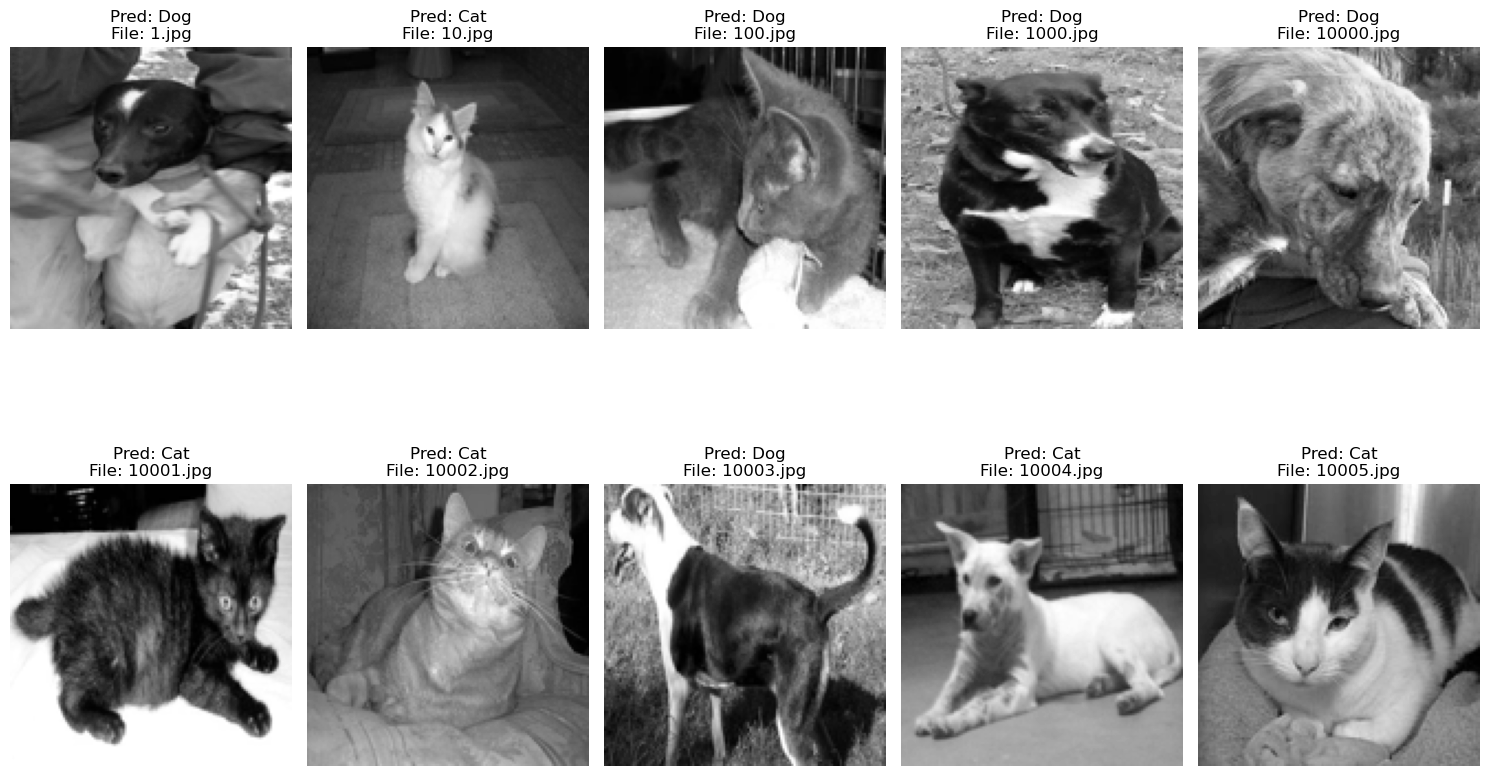

In [49]:
import matplotlib.pyplot as plt

# Function to plot images with predicted labels
def plot_images_with_predictions(images, predictions, image_files, num_images=10):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(128, 128), cmap='gray')  # Reshape to display grayscale
        plt.title(f"Pred: {'Dog' if predictions[i] == 1 else 'Cat'}\nFile: {image_files[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot the first 10 images with predictions
plot_images_with_predictions(images, predicted_classes, image_files, num_images=10)


In [50]:
# Saving the model
model.save('dogvscat.h5')